In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("crop_yield.csv")
dataset=data

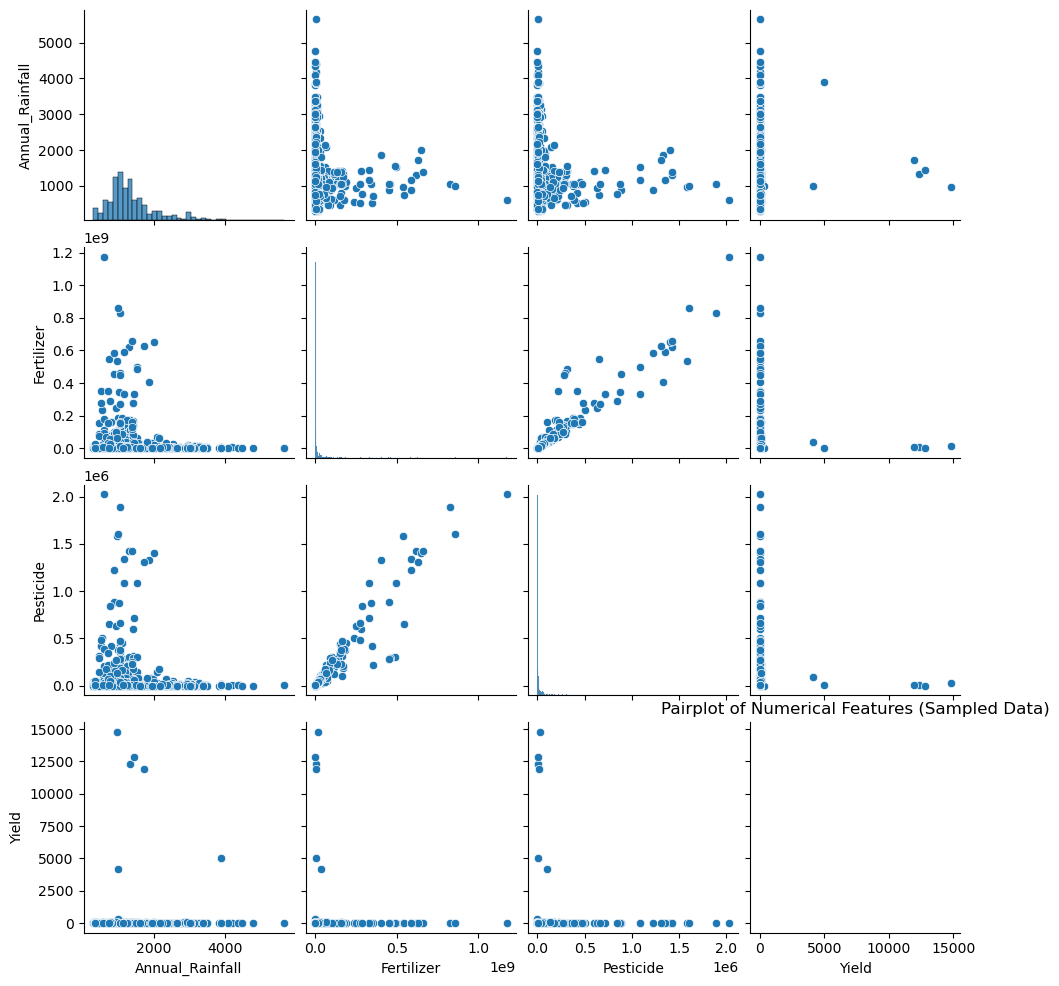

In [3]:
# Sample a subset of the data
sampled_data = data.sample(n=5000)
# Create the pair plot for the sampled data
sns.pairplot(data=sampled_data, vars=["Annual_Rainfall", "Fertilizer", "Pesticide", "Yield"])
plt.title("Pairplot of Numerical Features (Sampled Data)")
plt.show()

In [4]:
# Select relevant columns
selected_columns = ["Crop", "Crop_Year", "Season", "State", "Annual_Rainfall", "Yield"]
data = data[selected_columns]

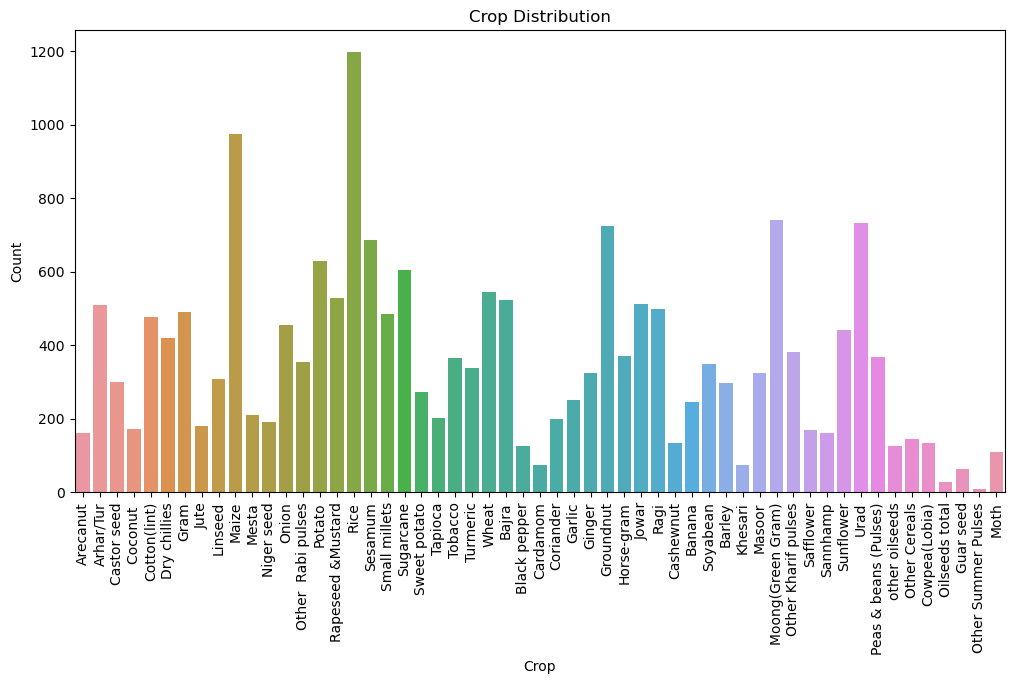

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Crop")
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.show()

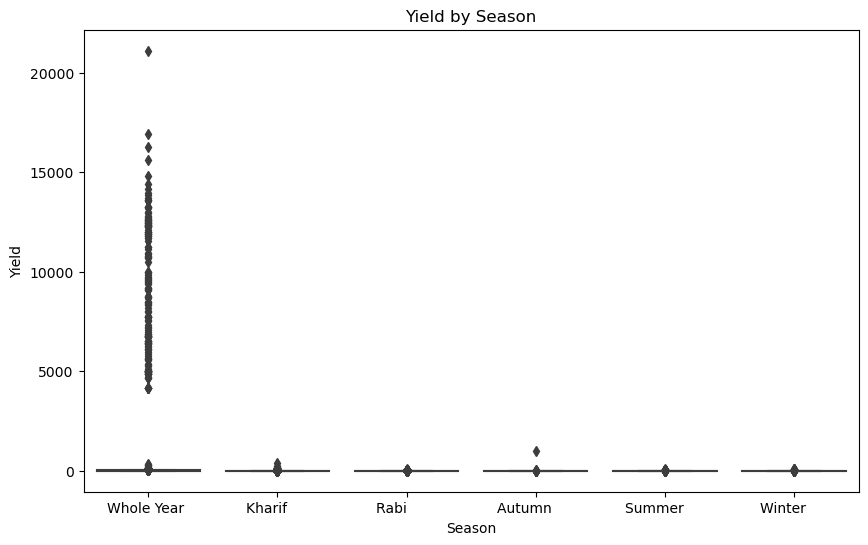

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Season", y="Yield")
plt.title("Yield by Season")
plt.xlabel("Season")
plt.ylabel("Yield")
plt.show()

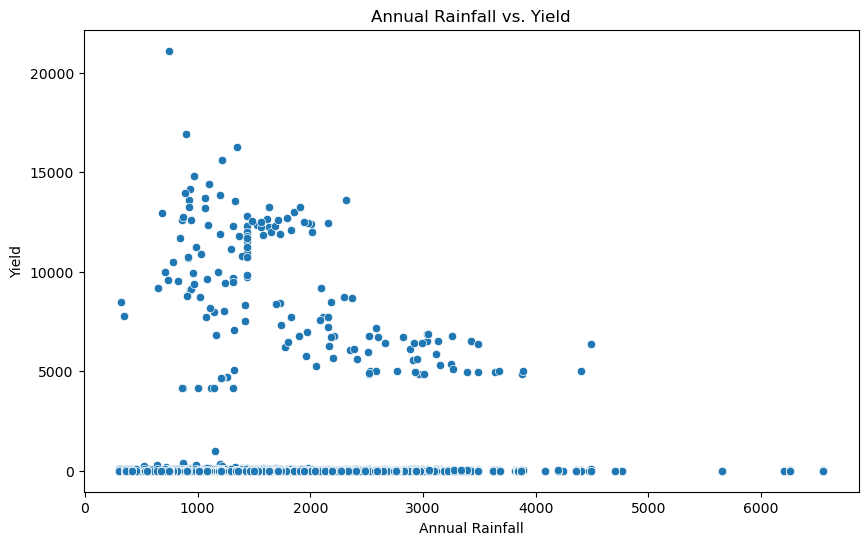

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Annual_Rainfall", y="Yield")
plt.title("Annual Rainfall vs. Yield")
plt.xlabel("Annual Rainfall")
plt.ylabel("Yield")
plt.show()

/tmp/ipykernel_33257/2044350880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


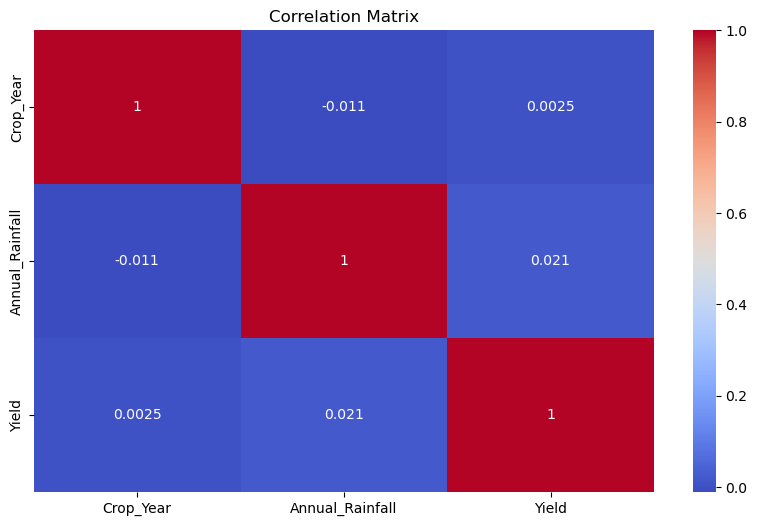

In [8]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Encode categorical variables (e.g., one-hot encoding)
data = pd.get_dummies(data, columns=["Crop", "Season", "State"])

In [10]:
# Split the data into features (X) and target variable (y)
X = data.drop("Yield", axis=1)
y = data["Yield"]

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize the features
scaler = StandardScaler()
X_train["Annual_Rainfall"] = scaler.fit_transform(X_train["Annual_Rainfall"].values.reshape(-1, 1))
X_test["Annual_Rainfall"] = scaler.transform(X_test["Annual_Rainfall"].values.reshape(-1, 1))

In [13]:
# Create individual regression models
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
xgboost = XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

In [14]:
# Create a VotingRegressor that combines the three models
ensemble_model = VotingRegressor(estimators=[('RandomForest', random_forest), ('XGBoost', xgboost)])

In [15]:
# Train the ensemble model
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('RandomForest',
                             RandomForestRegressor(random_state=42)),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...))])

In [16]:
# Make predictions using the ensemble model
predictions = ensemble_model.predict(X_test)

In [17]:
# Evaluate the ensemble model's performance (e.g., calculate RMSE or R2 score)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

R-squared: 0.9747497999227719


User input

In [18]:
# Function to preprocess user input and make predictions
def predict_yield(user_input):
    # Encode categorical variables in user input
    user_input_encoded = pd.get_dummies(user_input, columns=["Crop", "Season", "State"])
    
    # Ensure that the user input has the same set of features as the training data
    # This may involve adding missing columns with zeros
    missing_columns = set(X.columns) - set(user_input_encoded.columns)
    for column in missing_columns:
        user_input_encoded[column] = 0
    
    # Reorder columns to match the order during training
    user_input_encoded = user_input_encoded[X.columns]
    
    # Scale Annual_Rainfall using the same scaler as in training
    user_input_encoded["Annual_Rainfall"] = scaler.transform(user_input_encoded["Annual_Rainfall"].values.reshape(-1, 1))
    
    # Use the ensemble model to make predictions for user input
    user_predictions = ensemble_model.predict(user_input_encoded)
    
    return user_predictions

In [19]:
user_input = {
    "Crop": "Potato",
    "Crop_Year": 2022,
    "Season": "Whole Year",
    "State": "Assam",
    "Annual_Rainfall": 2050.0
}

In [20]:
# Convert the user input dictionary into a DataFrame
user_input_df = pd.DataFrame([user_input])

In [21]:
# Make predictions for the user input
user_yield_predictions = predict_yield(user_input_df)

In [22]:
print("Predicted Yield:", user_yield_predictions[0])

Predicted Yield: 8.210484076567294
